# Part II - (Loan Data from Prosper: Presentation)
## by (Kenny Brian)

## Investigation Overview

>To determine the distribution of loan amounts. The distribution of loan amounts is skewed to the right. there are peaks at 5000, 10000, 15000, 20000 and 25000.

>Correlation between mean credit score & Loan Original Amount. There is a positive correlation between mean credit score and loan original amount. Borrowers with a higher mean credit score have relatively higher loan amounts

>The distribution of interest rates among the different employment levels. Generally, those stated being in full time and part time employment had a relatively low interest rates on their loans as compared to those stated that they were unemployed

>Comparison between interest rates, homeownership and employments levels. home owners had relatively low interest rates compared to non homeowners across all employments levels except those that stated that they were not employed. For those not employed, home owners had a relatively higher interest rates compared to none home owners


## Dataset Overview

> This data set contains 113,937 entries with 81 variables on each loan, including loan amount, borrower rate (or interest rate), credit rating, borrower income, employment and many others. For this analyses, only 15 varibles have been used. thus the dataset was trimmed to include 15 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('df_loan')

## (Visualization 1)

> The distribution of loan amounts is skewed to the right. there are peaks at 5000, 10000, 15000, 20000 and 25000.



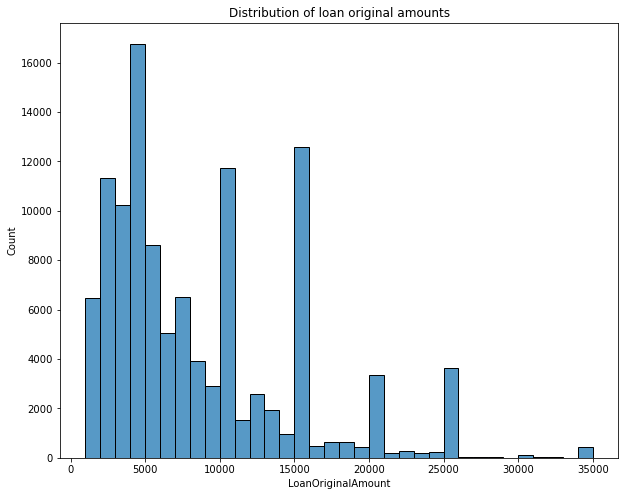

In [8]:
plt.figure(figsize=[10,8])

bins= np.arange(1000, df['LoanOriginalAmount'].max()+1000, 1000)
sb.histplot(data=df, x='LoanOriginalAmount', bins=bins)
plt.title('Distribution of loan original amounts');

## (Visualization 2)

There is a positive correlation between mean credit score and loan original amount. Borrowers with a higher mean credit score have relatively higher loan amounts

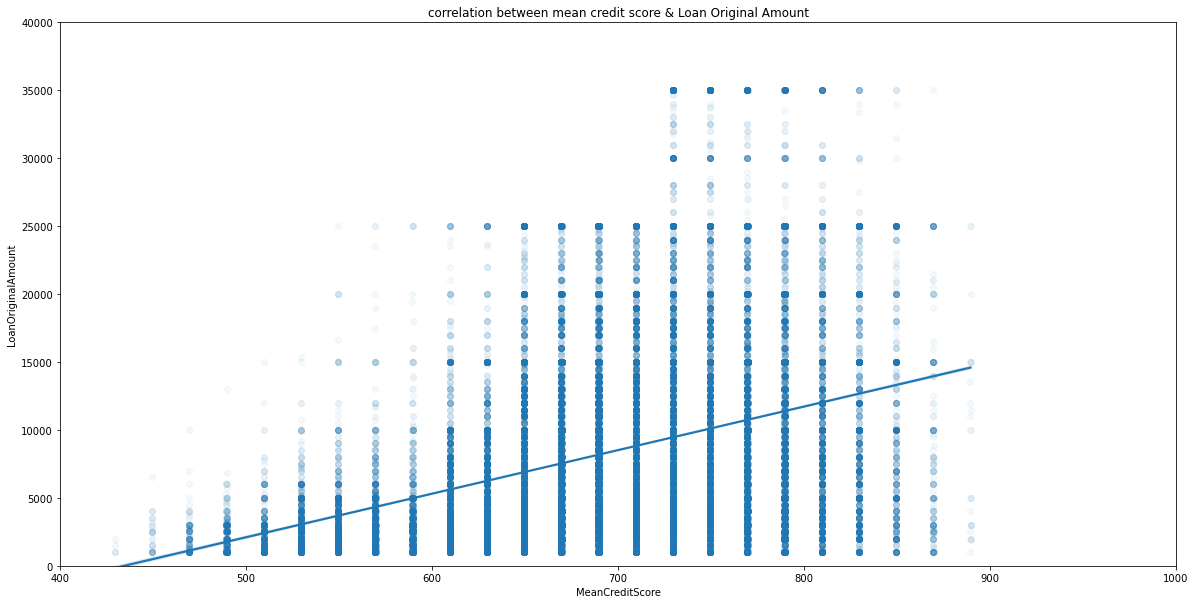

In [12]:
df['MeanCreditScore'] = ((df.CreditScoreRangeLower + df.CreditScoreRangeUpper)/2)
plt.figure(figsize =(20,10))

sb.regplot(data=df, y='LoanOriginalAmount', x= 'MeanCreditScore', x_jitter=0.1, scatter_kws={'alpha':1/20})
#limit the y axes to start at zero
plt.ylim(0,40000)
#limiting the x axis to start from 400
plt.xlim(400,1000)
plt.title('correlation between mean credit score & Loan Original Amount');

## (Visualization 3)

Generally, those stated being in full time and part time employment had a relatively low interest rates on their loans as compared to those stated that they were unemployed

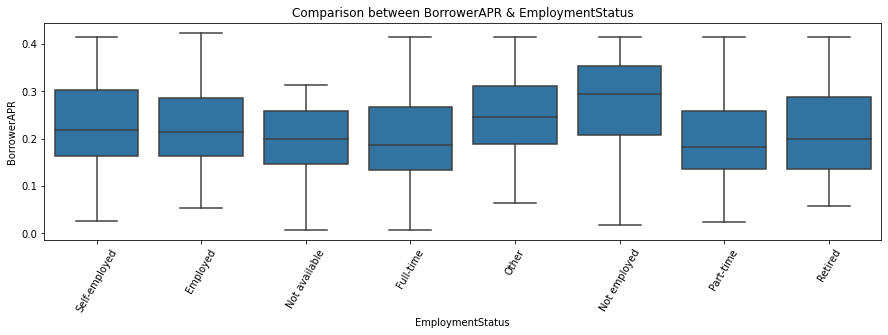

In [16]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[15,4])
sb.boxplot(data=df, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=60)
plt.title('Comparison between BorrowerAPR & EmploymentStatus');

## (Visualization 4)

Generally, home owners had relatively low interest rates compared to non homeowners across all employments levels except those that stated that they were not employed. For those not employed, home owners had a relatively higher interest rates compared to none home owners

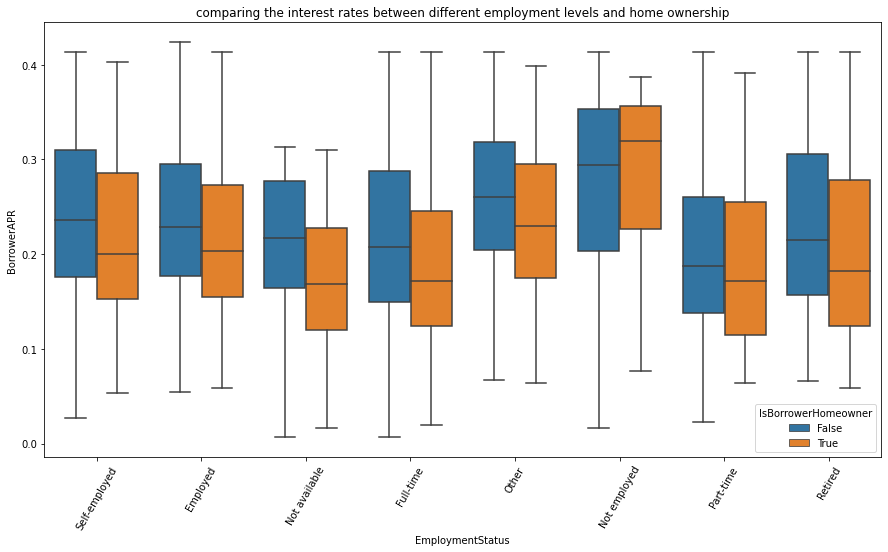

In [18]:
plt.figure(figsize=[15,8])
sb.boxplot(data=df, x='EmploymentStatus', y='BorrowerAPR', hue='IsBorrowerHomeowner')
plt.xticks(rotation=60)
plt.title('comparing the interest rates between different employment levels and home ownership');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Loan_Data.ipynb --to slides --post serve --no-input --no-prompt